In [57]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 MB 5.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 6.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 7.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 7.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 9.9 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

Note: you may need to restart the kernel to use updated packages.


# Import the necessary packages

In [273]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [274]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("Dataset/hessi.solar.flare.2002to2016.csv", parse_dates=["start.date"], 
                          dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
solar_flare.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [275]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')

In [276]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

0        2002-02-12 21:33:38
1        2002-02-12 21:45:06
2        2002-02-13 00:54:54
3        2002-02-13 04:23:50
4        2002-02-13 07:05:14
                 ...        
113937   2016-12-26 22:17:02
113938   2016-12-26 23:28:18
113939   2016-12-27 08:39:06
113940   2016-12-27 12:21:30
113941   2016-12-27 12:37:14
Name: start_datetime, Length: 113942, dtype: datetime64[ns]

In [277]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [278]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


Peak Rate: peak counts/second in energy range 6-12 keV, averaged over active collimators, including background.<br>

Total Counts: counts in energy range 6-12 keV integrated over duration of flare summed over all subcollimators,
including background.<br>

Energy: the highest energy band in which the flare was observed. Electron Kev (kilo electron volt)<br>
https://en.wikipedia.org/wiki/Electronvolt<br>

Radial Distance: distance from Sun center<br>

Quality Codes: Qn, where n is the total number of data gap, SAA, particle, eclipse or decimation flags set for event.<br>
n ranges from 0 to 11. Use care when analyzing the data when the quality is not zero.<br>
<br>
Active_Region: A number for the closest active region, if available<br>

radial_offset: the offset of the flare position from the spin axis of the spacecraft in arcsec. This is used i
spectroscopy.<br>

peak_c/s: peak count rate in corrected counts.<br>

Flare Flag Codes:<br>
a0 - In attenuator state 0 (None) sometime during flare<br>
a1 - In attenuator state 1 (Thin) sometime during flare<br>
a2 - In attenuator state 2 (Thick) sometime during flare<br>
a3 - In attenuator state 3 (Both) sometime during flare<br>
An - Attenuator state (0=None, 1=Thin, 2=Thick, 3=Both) at peak of flare<br>
DF - Front segment counts were decimated sometime during flare<br>
DR - Rear segment counts were decimated sometime during flare<br>
ED - Spacecraft eclipse (night) sometime during flare<br>
EE - Flare ended in spacecraft eclipse (night)<br>
ES - Flare started in spacecraft eclipse (night)<br>
FE - Flare ongoing at end of file<br>
FR - In Fast Rate Mode<br>
FS - Flare ongoing at start of file<br>
GD - Data gap during flare<br>
GE - Flare ended in data gap<br>
GS - Flare started in data gap<br>
MR - Spacecraft in high-latitude zone during flare<br>
NS - Non-solar event<br>
PE - Particle event: Particles are present<br>
PS - Possible Solar Flare; in front detectors, but no position<br>
Pn - Position Quality: P0 = Position is NOT valid, P1 = Position is valid<br>
Qn - Data Quality: Q0 = Highest Quality, Q11 = Lowest Quality<br>
SD - Spacecraft was in SAA sometime during flare<br>
SE - Flare ended when spacecraft was in SAA<br>
SS - Flare started when spacecraft was in SAA<br>

In [279]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113942 entries, 2002-02-12 21:33:38 to 2016-12-27 12:37:14
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             113942 non-null  int64   
 1   duration.s        113942 non-null  int64   
 2   peak.c/s          113942 non-null  int64   
 3   total.counts      113942 non-null  float64 
 4   energy.kev        113942 non-null  category
 5   x.pos.asec        113942 non-null  int64   
 6   y.pos.asec        113942 non-null  int64   
 7   radial            113942 non-null  int64   
 8   active.region.ar  113942 non-null  category
 9   flag.1            113942 non-null  object  
 10  flag.2            113942 non-null  object  
 11  flag.3            94035 non-null   object  
 12  flag.4            93740 non-null   object  
 13  flag.5            52991 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.7

In [280]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.139420e+05,113942.000000,113942.000000,1.139420e+05,113942.000000,113942.000000,113942.000000
mean,1.086459e+07,493.051728,212.321532,3.772013e+05,-9.752181,-43.129812,689.528892
std,9.832864e+06,433.389295,833.776871,3.071203e+06,757.017401,404.547666,513.203089
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.110734e+06,212.000000,28.000000,2.292000e+04,-704.000000,-249.000000,469.000000
50%,1.112022e+07,364.000000,53.000000,5.857400e+04,0.000000,-75.000000,759.000000
75%,1.403013e+07,628.000000,144.000000,1.794420e+05,706.000000,198.000000,946.000000
max,1.412161e+08,4444.000000,113156.000000,4.355501e+08,1002.000000,1012.000000,14154.000000


In [281]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

flare
13111352    2
13111351    2
3042103     2
Name: count, dtype: int64
Number of duplicates in the 'flare' column: 3


In [282]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  113942
Length of dataframe after dropping duplicates:  113939


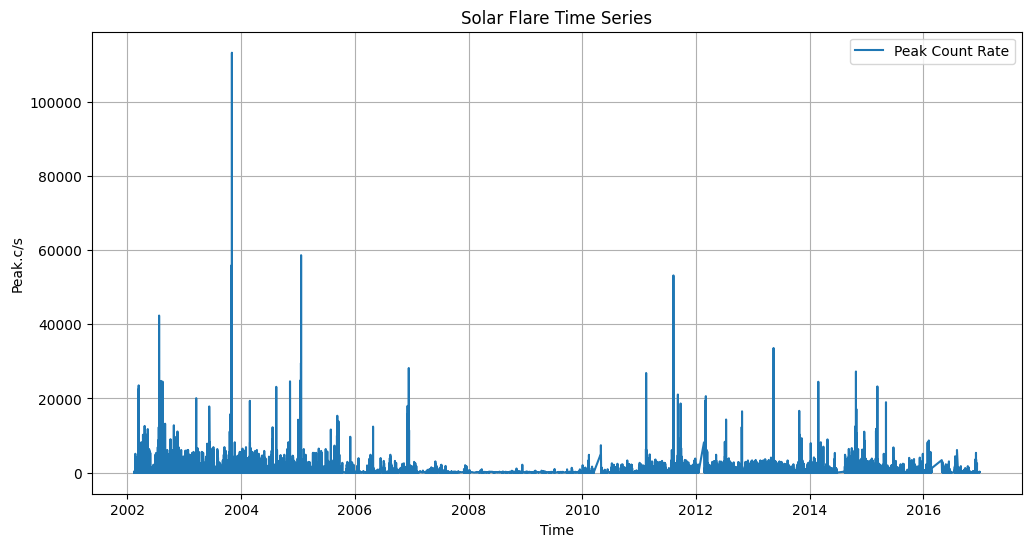

In [283]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['peak.c/s'], label='Peak Count Rate')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Peak.c/s')
plt.legend()
plt.grid(True)
plt.show()

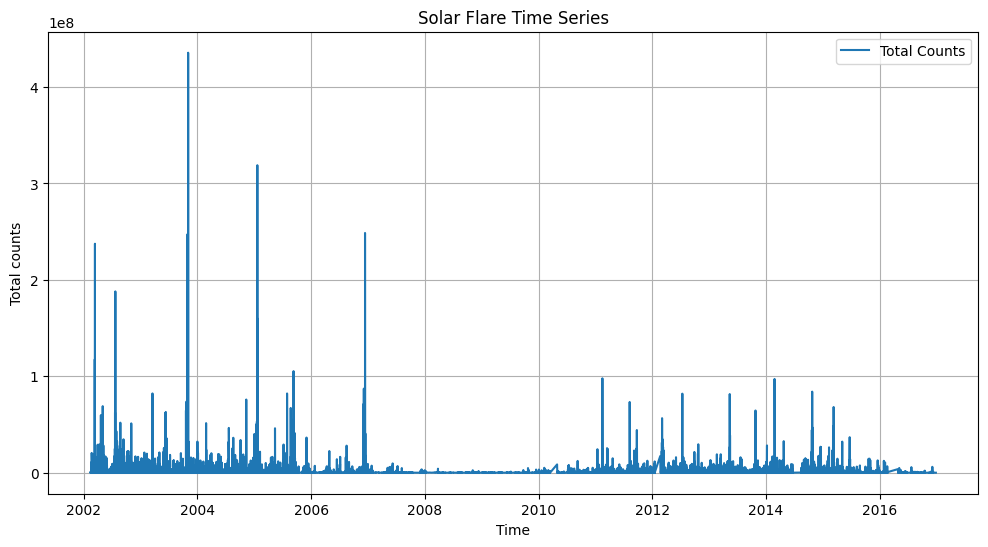

In [284]:
import matplotlib.pyplot as plt

# Plot the time series data for 'peak.c/s' and 'total.counts'
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['total.counts'], label='Total Counts')
plt.title('Solar Flare Time Series')
plt.xlabel('Time')
plt.ylabel('Total counts')
plt.legend()
plt.grid(True)
plt.show()

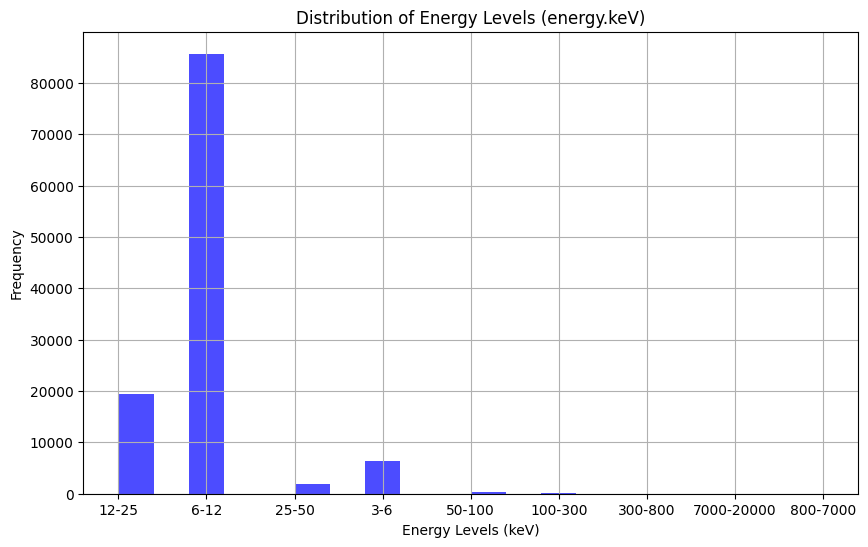

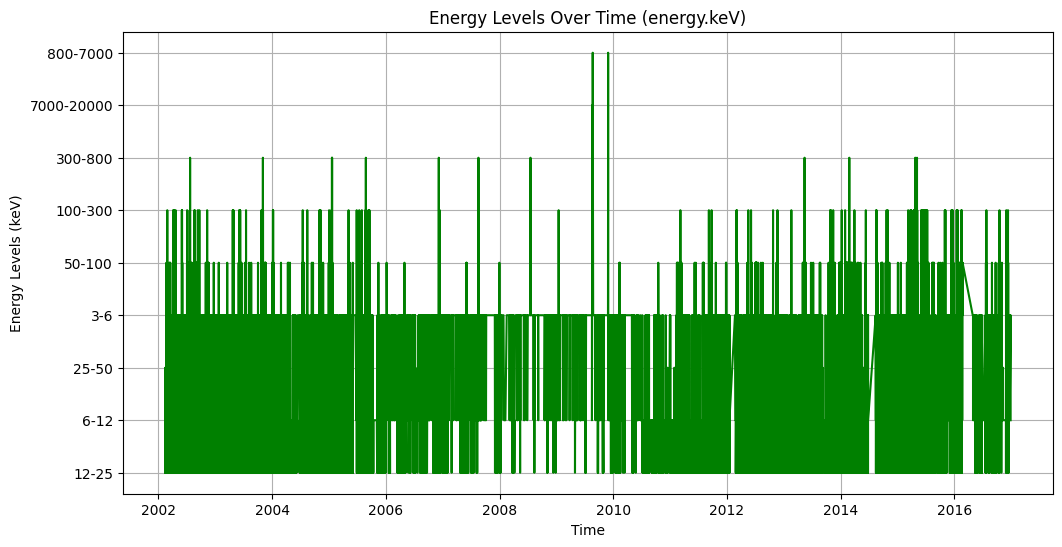

In [285]:
import matplotlib.pyplot as plt

# Histogram of energy.keV
plt.figure(figsize=(10, 6))
plt.hist(solar_flare['energy.kev'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Energy Levels (energy.keV)')
plt.xlabel('Energy Levels (keV)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Time Series Plot of energy.keV
plt.figure(figsize=(12, 6))
plt.plot(solar_flare.index, solar_flare['energy.kev'], color='green')
plt.title('Energy Levels Over Time (energy.keV)')
plt.xlabel('Time')
plt.ylabel('Energy Levels (keV)')
plt.grid(True)
plt.show()


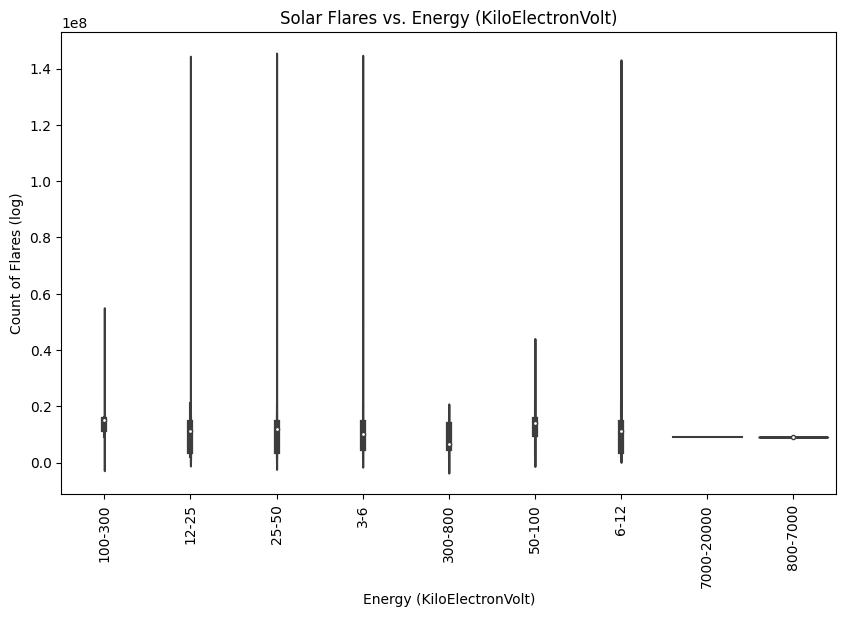

In [286]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.violinplot(data=solar_flare, x='energy.kev', y='flare', fill='gold')
plt.title('Solar Flares vs. Energy (KiloElectronVolt)')
plt.xlabel('Energy (KiloElectronVolt)')
plt.ylabel('Count of Flares (log)')
plt.xticks(rotation=90)
plt.show()

In [248]:
solar_flare = solar_flare.iloc[:, :9]
solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar
start_datetime,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825
...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0


**Correlation Analysis:**
Compute the correlation matrix to identify pairwise correlations between variables.
High correlations (close to 1 or -1) between pairs of input features may indicate multicollinearity.

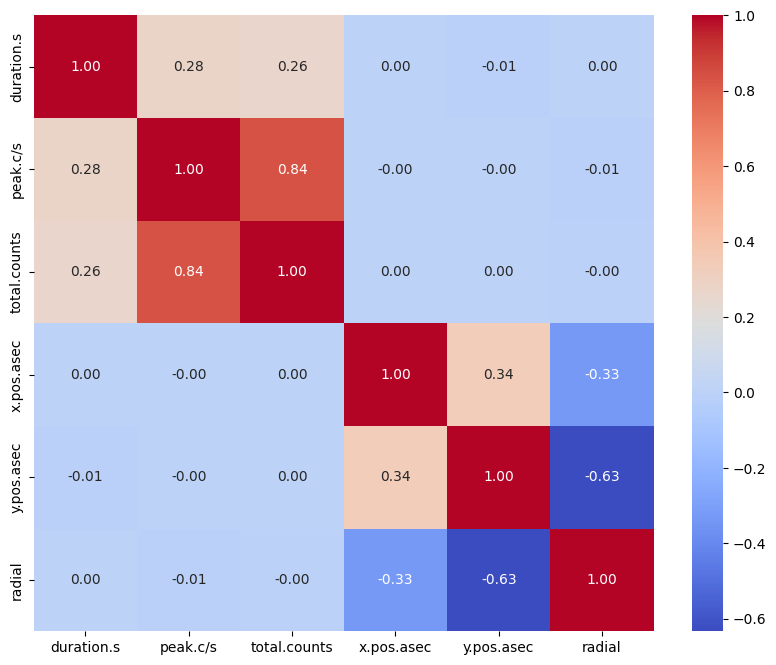

In [90]:
import pandas as pd

# Assuming df is your DataFrame with the mentioned variables
correlation_matrix = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']].corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

**VIF (Variance Inflation Factor):**
Calculate the Variance Inflation Factor for each variable to quantify multicollinearity.

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame with the variables of interest
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]

# Add a constant for the intercept term
X['intercept'] = 1

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF values
print(vif_data)

# Find the variable with the highest VIF
variable_with_highest_vif = vif_data.loc[vif_data['VIF'].idxmax()]

# Display the variable with the highest VIF
print("Variable with the highest VIF:")
print(variable_with_highest_vif)


       Variable       VIF
0    duration.s  1.086169
1      peak.c/s  3.432127
2  total.counts  3.404821
3    x.pos.asec  1.158818
4    y.pos.asec  1.721463
5        radial  1.717288
6     intercept  5.202871
Variable with the highest VIF:
Variable    intercept
VIF          5.202871
Name: 6, dtype: object


Typically, a VIF value below 5 is considered acceptable, indicating low multicollinearity. None of your features have VIF values significantly exceeding this threshold, suggesting that multicollinearity is not a severe issue.

If you still want to reduce multicollinearity further, you might consider removing the feature with the highest VIF among the actual features (excluding the intercept term). In this case, the total.counts feature has the highest VIF (3.281116), but this value is not extremely high.

You could choose to keep all features, or if you prefer to be conservative in addressing multicollinearity, you might consider removing the feature with the highest VIF, which is total.counts. 

**Feature Selection:**
Use techniques like Recursive Feature Elimination (RFE) or feature importance from tree-based models to select the most important features.

In [383]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming y is your target variable
X = solar_flare[['duration.s', 'peak.c/s', 'total.counts', 'x.pos.asec', 'y.pos.asec', 'radial']]
y = solar_flare['energy.kev']

# Use RandomForestRegressor for feature selection
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X, y)

# Display the selected features
selected_features = X.columns[fit.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['duration.s', 'peak.c/s', 'total.counts', 'radial'], dtype='object')



Recursive Feature Elimination (RFE) is a feature selection technique that works by recursively removing the least important features, based on the contribution of each feature to the model's performance. This process continues until the desired number of features is reached. RFE is particularly useful when you have a large number of features, and you want to select a subset of them that contributes the most to the model's predictive power.

# Peak c/s - Target variable 1 

## 100 Epoch training
In the context of training machine learning models, an epoch refers to one complete pass through the entire training dataset. During an epoch, the model is exposed to all the training examples once, and the model's parameters are updated based on the loss calculated for those examples.<br>
<br>
Here's how the training process typically works within each epoch:<br>
<br>
The training dataset is divided into batches or mini-batches. Each batch contains a subset of the training examples.<br>
<br>
The model processes each batch in sequence, calculates the loss for that batch, and updates its parameters (e.g., weights and biases) using an optimization algorithm (e.g., gradient descent).<br>
<br>
This process is repeated for each batch in the training dataset.<br>
<br>
Once all the batches have been processed, the model has completed one epoch. The number of epochs you specify when training a machine learning model determines how many times the entire training dataset will be processed in this manner.<br>
<br>
The purpose of training the model through multiple epochs is to allow it to learn from the data gradually and improve its performance. The model's parameters are adjusted during each epoch to minimize the loss function, which measures the error between the model's predictions and the actual target values. As the model iteratively refines its parameters, it becomes better at making predictions on the training data. However, it's important to find the right balance in terms of the number of epochs, as training for too many epochs can lead to overfitting (where the model performs well on the training data but poorly on unseen data).

In [384]:
results=[]

# LSTM

## peak.c/s - Target variable 1

In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Extract the feature you want to forecast (e.g., 'peak.c/s')
target_feature = 'peak.c/s'

# Extract the target time series data
target_data = solar_flare[target_feature].values

# Normalize the data
scaler = MinMaxScaler()
target_data = scaler.fit_transform(target_data.reshape(-1, 1))

# Create sequences and corresponding target values
look_back = 10  # Number of previous time steps to use for prediction
X, y = [], []

for i in range(len(target_data) - look_back):
    X.append(target_data[i:i + look_back])
    y.append(target_data[i + look_back])

X, y = np.array(X), np.array(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Evaluate the model
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)


Epoch 1/100
1425/1425 - 4s - loss: 5.9762e-05 - val_loss: 3.1399e-05 - 4s/epoch - 3ms/step
Epoch 2/100
1425/1425 - 3s - loss: 5.9445e-05 - val_loss: 3.1305e-05 - 3s/epoch - 2ms/step
Epoch 3/100
1425/1425 - 3s - loss: 5.9324e-05 - val_loss: 3.1251e-05 - 3s/epoch - 2ms/step
Epoch 4/100
1425/1425 - 3s - loss: 5.9313e-05 - val_loss: 3.1178e-05 - 3s/epoch - 2ms/step
Epoch 5/100
1425/1425 - 3s - loss: 5.9172e-05 - val_loss: 3.1338e-05 - 3s/epoch - 2ms/step
Epoch 6/100
1425/1425 - 3s - loss: 5.9272e-05 - val_loss: 3.1166e-05 - 3s/epoch - 2ms/step
Epoch 7/100
1425/1425 - 3s - loss: 5.9226e-05 - val_loss: 3.1333e-05 - 3s/epoch - 2ms/step
Epoch 8/100
1425/1425 - 3s - loss: 5.9280e-05 - val_loss: 3.1303e-05 - 3s/epoch - 2ms/step
Epoch 9/100
1425/1425 - 3s - loss: 5.8946e-05 - val_loss: 3.1758e-05 - 3s/epoch - 2ms/step
Epoch 10/100
1425/1425 - 3s - loss: 5.9081e-05 - val_loss: 3.1459e-05 - 3s/epoch - 2ms/step
Epoch 11/100
1425/1425 - 3s - loss: 5.9101e-05 - val_loss: 3.1124e-05 - 3s/epoch - 2ms/st

Epoch 91/100
1425/1425 - 3s - loss: 5.8790e-05 - val_loss: 3.1417e-05 - 3s/epoch - 2ms/step
Epoch 92/100
1425/1425 - 3s - loss: 5.8310e-05 - val_loss: 3.1329e-05 - 3s/epoch - 2ms/step
Epoch 93/100
1425/1425 - 3s - loss: 5.8292e-05 - val_loss: 3.0896e-05 - 3s/epoch - 2ms/step
Epoch 94/100
1425/1425 - 3s - loss: 5.8245e-05 - val_loss: 3.1278e-05 - 3s/epoch - 2ms/step
Epoch 95/100
1425/1425 - 3s - loss: 5.8561e-05 - val_loss: 3.1071e-05 - 3s/epoch - 2ms/step
Epoch 96/100
1425/1425 - 3s - loss: 5.8274e-05 - val_loss: 3.1134e-05 - 3s/epoch - 2ms/step
Epoch 97/100
1425/1425 - 3s - loss: 5.8380e-05 - val_loss: 3.1206e-05 - 3s/epoch - 2ms/step
Epoch 98/100
1425/1425 - 3s - loss: 5.8365e-05 - val_loss: 3.1176e-05 - 3s/epoch - 2ms/step
Epoch 99/100
1425/1425 - 3s - loss: 5.8272e-05 - val_loss: 3.0790e-05 - 3s/epoch - 2ms/step
Epoch 100/100
1425/1425 - 3s - loss: 5.8205e-05 - val_loss: 3.1180e-05 - 3s/epoch - 2ms/step
713/713 [==============================] - 0s 579us/step


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, test_predictions)
mse = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predictions)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')

Mean Absolute Error (MAE): 155.95
Mean Squared Error (MSE): 54690.80
Root Mean Squared Error (RMSE): 233.86
R-squared (R²): -1680085046.09


## energy.kev - Target variable 2 

In [385]:
model_name="LSTM 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

[[ 0.5030246  -0.09420199 -0.06872918  0.00802093]
 [-0.47368634 -0.24788813 -0.1204874   0.01193201]
 [-0.6395429  -0.2383572  -0.11984977 -0.3928647 ]
 ...
 [-0.7961852  -0.2383572  -0.12287523 -1.1085923 ]
 [-0.59347165 -0.23716584 -0.12251837 -0.9091271 ]
 [-0.00375941 -0.20619035 -0.11841707  0.48321703]]
Epoch 1/100
1452/1452 [==============================] - 4s 2ms/step - loss: 0.7339 - accuracy: 0.7621 - val_loss: 0.9294 - val_accuracy: 0.7106 - lr: 0.0010
Epoch 2/100
1452/1452 [==============================] - 3s 2ms/step - loss: 0.6899 - accuracy: 0.7706 - val_loss: 0.9245 - val_accuracy: 0.7074 - lr: 0.0010
Epoch 3/100
1452/1452 [==============================] - 3s 2ms/step - loss: 0.6847 - accuracy: 0.7723 - val_loss: 0.9307 - val_accuracy: 0.7078 - lr: 0.0010
Epoch 4/100
1452/1452 [==============================] - 3s 2ms/step - loss: 0.6814 - accuracy: 0.7731 - val_loss: 0.9399 - val_accuracy: 0.7086 - lr: 0.0010
Epoch 5/100
1452/1452 [==============================] -

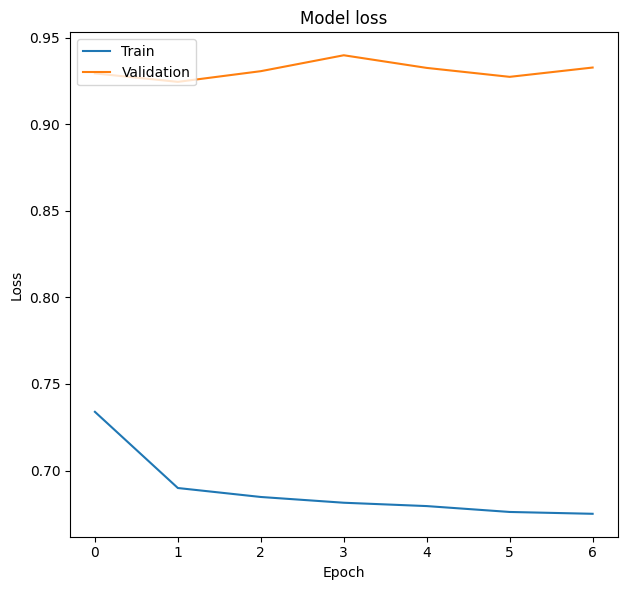

726/726 [==============================] - 0s 649us/step - loss: 0.9245 - accuracy: 0.7074
Test Accuracy: 70.74%


In [386]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [387]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Test it on solar data 2017-2018

In [388]:
# Load the data with specified bcolumn classes
solar_flare = pd.read_csv("Dataset/hessi.solar.flare.UP_To_2018.csv", parse_dates=["start.date"], 
                          dtype={"energy.kev": "category", "total.counts": "float64", "active.region.ar": "category"})
solar_flare.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


In [389]:
solar_flare['start.date'] = solar_flare['start.date'].dt.strftime('%Y-%m-%d')

In [390]:
solar_flare['start_datetime'] = pd.to_datetime(solar_flare['start.date'] + ' ' + solar_flare['peak'])
solar_flare['start_datetime']

0        2002-02-12 21:33:38
1        2002-02-12 21:45:06
2        2002-02-13 00:54:54
3        2002-02-13 04:23:50
4        2002-02-13 07:05:14
                 ...        
116138   2018-02-09 16:42:54
116139   2018-02-09 18:17:26
116140   2018-02-10 13:06:46
116141   2018-02-26 15:51:18
116142   2018-03-03 04:06:22
Name: start_datetime, Length: 116143, dtype: datetime64[ns]

In [391]:
# Set 'start_datetime' as the index of the DataFrame
solar_flare.set_index('start_datetime', inplace=True)

In [392]:
# Drop the specified columns from the 'solar_flare' DataFrame
columns_to_drop = ['start.date', 'start.time', 'peak', 'end']
solar_flare = solar_flare.drop(columns=columns_to_drop)

solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2002-02-12 21:33:38,2021213,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
2002-02-12 21:45:06,2021228,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2002-02-13 00:54:54,2021332,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
2002-02-13 04:23:50,2021308,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
2002-02-13 07:05:14,2021310,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 16:42:54,18020903,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09 18:17:26,18020904,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10 13:06:46,18021001,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


In [393]:
solar_flare.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 116143 entries, 2002-02-12 21:33:38 to 2018-03-03 04:06:22
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   flare             116143 non-null  int64   
 1   duration.s        116143 non-null  int64   
 2   peak.c/s          116143 non-null  int64   
 3   total.counts      116143 non-null  float64 
 4   energy.kev        116143 non-null  category
 5   x.pos.asec        116143 non-null  int64   
 6   y.pos.asec        116143 non-null  int64   
 7   radial            116143 non-null  int64   
 8   active.region.ar  116143 non-null  category
 9   flag.1            116143 non-null  object  
 10  flag.2            116143 non-null  object  
 11  flag.3            96236 non-null   object  
 12  flag.4            95941 non-null   object  
 13  flag.5            54963 non-null   object  
dtypes: category(2), float64(1), int64(6), object(5)
memory usage: 11.9

In [394]:
solar_flare.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial
count,1.161430e+05,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000
mean,1.099563e+07,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989
std,9.888161e+06,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000
25%,4.112632e+06,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000
50%,1.112297e+07,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000
75%,1.404222e+07,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000
max,1.711151e+08,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000


In [395]:
duplicates_count = solar_flare['flare'].duplicated(keep=False).sum()

value_counts = solar_flare['flare'].value_counts()

duplicates = value_counts[value_counts>1]
print(duplicates)
print(f"Number of duplicates in the 'flare' column: {len(duplicates)}")

flare
13111352    2
13111351    2
3042103     2
Name: count, dtype: int64
Number of duplicates in the 'flare' column: 3


In [396]:
print("Length of dataframe before dropping duplicates: ", len(solar_flare))
solar_flare = solar_flare.drop_duplicates(subset='flare')
print("Length of dataframe after dropping duplicates: ", len(solar_flare))

Length of dataframe before dropping duplicates:  116143
Length of dataframe after dropping duplicates:  116140


In [397]:
# Filter data for the years 2017 and 2018
solar_flare[solar_flare.index.year == year_to_extract]
new_solar_flare = solar_flare[(solar_flare.index.year == 2017) | (solar_flare.index.year == 2018)]

In [398]:
new_solar_flare

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2017-01-10 13:21:34,17011014,296,26,11561.0,6-12,883,268,923,0,A0,P1,PE,Q1,NaN
2017-01-10 15:13:34,17011001,268,232,67456.0,6-12,928,262,965,0,A0,P1,PE,Q2,SE
2017-01-10 16:45:46,17011004,724,720,340656.0,6-12,283,65,291,0,A0,P1,PE,Q1,NaN
2017-01-10 17:09:06,17011011,136,64,7104.0,6-12,918,270,957,0,A0,P1,PE,Q1,NaN
2017-01-10 18:07:14,17011005,604,720,239760.0,12-25,923,285,966,0,A0,DR,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-09 16:42:54,18020903,124,18,2888.0,6-12,-345,-38,347,2699,A0,DF,P1,PE,Q2
2018-02-09 18:17:26,18020904,104,16,1656.0,6-12,-268,-38,271,2699,A0,DF,P1,PE,Q2
2018-02-10 13:06:46,18021001,148,15,2224.0,6-12,-115,-38,121,2699,A0,DF,P1,PE,Q2


In [400]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 741us/step - loss: 1.0465 - accuracy: 0.7070
New Test Accuracy: 70.70%


In [401]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 0s 684us/step
Precision: 59.70%
Recall: 70.70%
F1 Score: 62.24%


# LSTM + GRU

In [402]:
model_name="LSTM + GRU 2002-2016"
epochs=100
batch_size=64
recurrent_dropout=0.0

[[ 0.5030246  -0.09420199 -0.06872918  0.00802093]
 [-0.47368634 -0.24788813 -0.1204874   0.01193201]
 [-0.6395429  -0.2383572  -0.11984977 -0.3928647 ]
 ...
 [-0.7961852  -0.2383572  -0.12287523 -1.1085923 ]
 [-0.59347165 -0.23716584 -0.12251837 -0.9091271 ]
 [-0.00375941 -0.20619035 -0.11841707  0.48321703]]
Epoch 1/100
1452/1452 [==============================] - 5s 3ms/step - loss: 0.7231 - accuracy: 0.7650 - val_loss: 0.9150 - val_accuracy: 0.7128 - lr: 0.0010
Epoch 2/100
1452/1452 [==============================] - 4s 3ms/step - loss: 0.6846 - accuracy: 0.7720 - val_loss: 0.9153 - val_accuracy: 0.7142 - lr: 0.0010
Epoch 3/100
1452/1452 [==============================] - 4s 3ms/step - loss: 0.6805 - accuracy: 0.7730 - val_loss: 0.8924 - val_accuracy: 0.7167 - lr: 0.0010
Epoch 4/100
1452/1452 [==============================] - 4s 3ms/step - loss: 0.6782 - accuracy: 0.7737 - val_loss: 0.8904 - val_accuracy: 0.7164 - lr: 0.0010
Epoch 5/100
1452/1452 [==============================] -

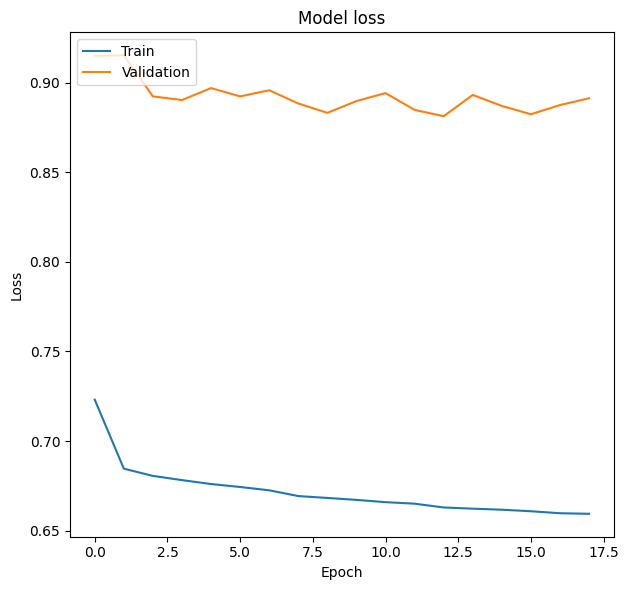

726/726 [==============================] - 1s 687us/step - loss: 0.8813 - accuracy: 0.7180
Test Accuracy: 71.80%


In [403]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [404]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [405]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '70.74%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.80%']]

# Test it on solar data 2017-2018

In [406]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 903us/step - loss: 1.0410 - accuracy: 0.7052
New Test Accuracy: 70.52%


In [407]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 0s 723us/step
Precision: 58.83%
Recall: 70.52%
F1 Score: 62.30%


## Hyperparameter tuning

Epoch 1/100
1425/1425 [==============================] - 5s 3ms/step - loss: 0.7278 - accuracy: 0.7637 - val_loss: 0.8715 - val_accuracy: 0.7215 - lr: 0.0010
Epoch 2/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6855 - accuracy: 0.7712 - val_loss: 0.8639 - val_accuracy: 0.7226 - lr: 0.0010
Epoch 3/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6812 - accuracy: 0.7724 - val_loss: 0.8511 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 4/100
1425/1425 [==============================] - 4s 2ms/step - loss: 0.6786 - accuracy: 0.7732 - val_loss: 0.8498 - val_accuracy: 0.7272 - lr: 0.0010
Epoch 5/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6766 - accuracy: 0.7736 - val_loss: 0.8525 - val_accuracy: 0.7285 - lr: 0.0010
Epoch 6/100
1425/1425 [==============================] - 4s 3ms/step - loss: 0.6754 - accuracy: 0.7738 - val_loss: 0.8460 - val_accuracy: 0.7287 - lr: 0.0010
Epoch 7/100
1425/1425 [=============================

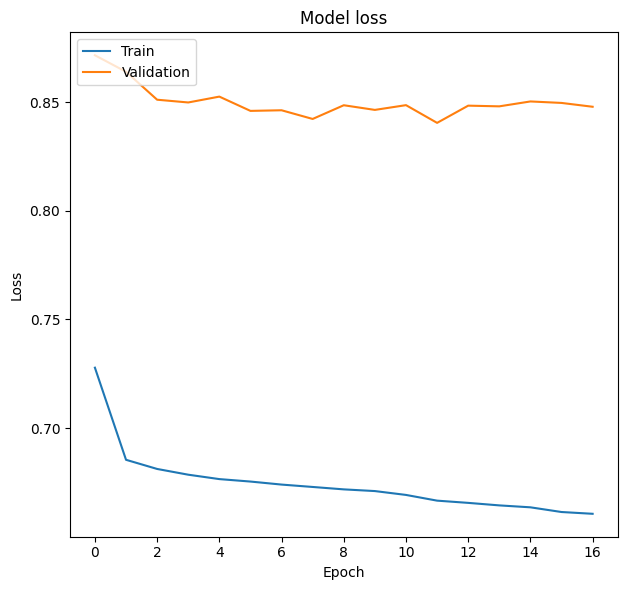

713/713 [==============================] - 0s 684us/step - loss: 0.8404 - accuracy: 0.7264
Recurrent Dropout: 0.0, Test Accuracy: 72.64%
Epoch 1/100
1425/1425 [==============================] - 13s 8ms/step - loss: 0.7283 - accuracy: 0.7638 - val_loss: 0.8893 - val_accuracy: 0.7169 - lr: 0.0010
Epoch 2/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6882 - accuracy: 0.7701 - val_loss: 0.8920 - val_accuracy: 0.7210 - lr: 0.0010
Epoch 3/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6823 - accuracy: 0.7719 - val_loss: 0.8798 - val_accuracy: 0.7226 - lr: 0.0010
Epoch 4/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6795 - accuracy: 0.7728 - val_loss: 0.8729 - val_accuracy: 0.7244 - lr: 0.0010
Epoch 5/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6780 - accuracy: 0.7731 - val_loss: 0.8613 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 6/100
1425/1425 [==============================] - 11s 8ms/ste

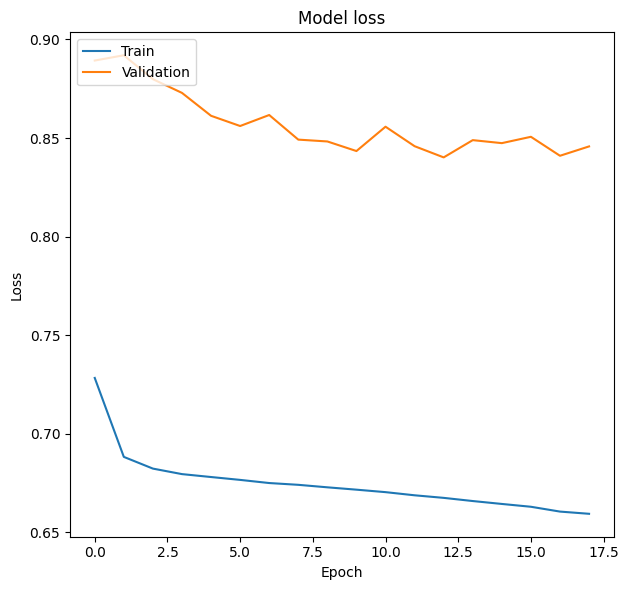

713/713 [==============================] - 1s 1ms/step - loss: 0.8402 - accuracy: 0.7265
Recurrent Dropout: 0.2, Test Accuracy: 72.65%
Epoch 1/100
1425/1425 [==============================] - 12s 8ms/step - loss: 0.7268 - accuracy: 0.7637 - val_loss: 0.8710 - val_accuracy: 0.7208 - lr: 0.0010
Epoch 2/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6875 - accuracy: 0.7708 - val_loss: 0.8746 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 3/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6831 - accuracy: 0.7716 - val_loss: 0.8628 - val_accuracy: 0.7255 - lr: 0.0010
Epoch 4/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6809 - accuracy: 0.7725 - val_loss: 0.8643 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 5/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6791 - accuracy: 0.7728 - val_loss: 0.8633 - val_accuracy: 0.7259 - lr: 0.0010
Epoch 6/100
1425/1425 [==============================] - 11s 8ms/step 

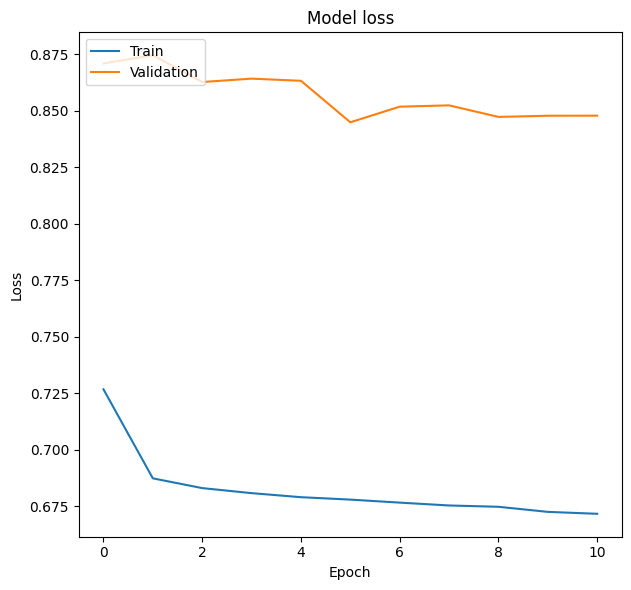

713/713 [==============================] - 1s 1ms/step - loss: 0.8450 - accuracy: 0.7263
Recurrent Dropout: 0.4, Test Accuracy: 72.63%
Epoch 1/100
1425/1425 [==============================] - 12s 8ms/step - loss: 0.7326 - accuracy: 0.7636 - val_loss: 0.8745 - val_accuracy: 0.7204 - lr: 0.0010
Epoch 2/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6920 - accuracy: 0.7692 - val_loss: 0.8901 - val_accuracy: 0.7194 - lr: 0.0010
Epoch 3/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6861 - accuracy: 0.7706 - val_loss: 0.8808 - val_accuracy: 0.7215 - lr: 0.0010
Epoch 4/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6828 - accuracy: 0.7715 - val_loss: 0.8804 - val_accuracy: 0.7208 - lr: 0.0010
Epoch 5/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6797 - accuracy: 0.7723 - val_loss: 0.8721 - val_accuracy: 0.7236 - lr: 5.0000e-04
Epoch 6/100
1425/1425 [==============================] - 11s 8ms/s

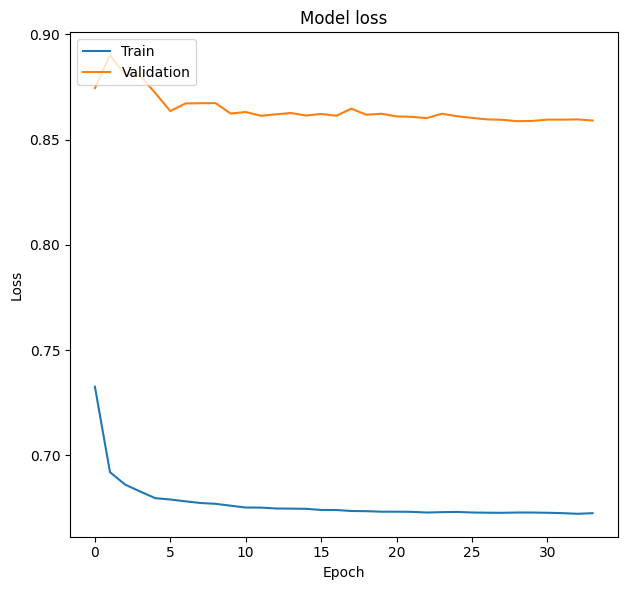

713/713 [==============================] - 1s 1ms/step - loss: 0.8587 - accuracy: 0.7259
Recurrent Dropout: 0.6, Test Accuracy: 72.59%
Epoch 1/100
1425/1425 [==============================] - 12s 8ms/step - loss: 0.7388 - accuracy: 0.7614 - val_loss: 0.8774 - val_accuracy: 0.7225 - lr: 0.0010
Epoch 2/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6933 - accuracy: 0.7688 - val_loss: 0.8673 - val_accuracy: 0.7241 - lr: 0.0010
Epoch 3/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6879 - accuracy: 0.7701 - val_loss: 0.8607 - val_accuracy: 0.7230 - lr: 0.0010
Epoch 4/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6846 - accuracy: 0.7710 - val_loss: 0.8648 - val_accuracy: 0.7249 - lr: 0.0010
Epoch 5/100
1425/1425 [==============================] - 11s 8ms/step - loss: 0.6823 - accuracy: 0.7721 - val_loss: 0.8573 - val_accuracy: 0.7258 - lr: 0.0010
Epoch 6/100
1425/1425 [==============================] - 11s 8ms/step 

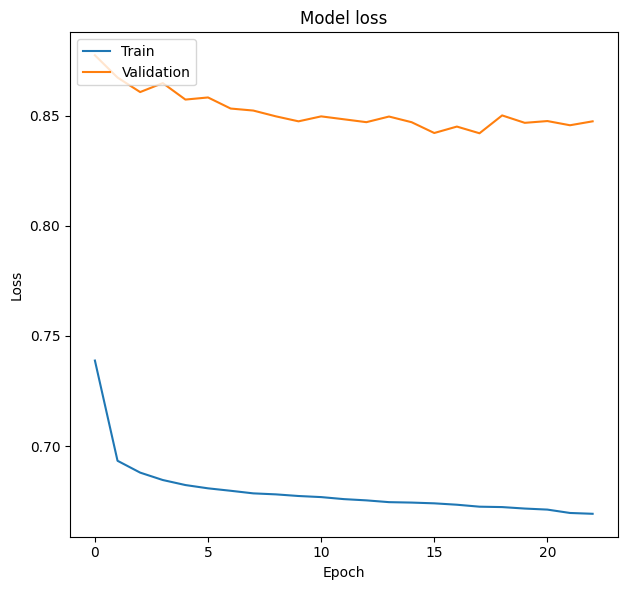

713/713 [==============================] - 1s 1ms/step - loss: 0.8420 - accuracy: 0.7287
Recurrent Dropout: 0.8, Test Accuracy: 72.87%


In [319]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Input, concatenate
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')


# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]

# Define a list of recurrent dropout values to try
recurrent_dropout_values = [0.0, 0.2, 0.4, 0.6, 0.8]

for dropout_value in recurrent_dropout_values:
    # Create an LSTM and a GRU model in parallel
    input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
    lstm_layer = LSTM(50, recurrent_dropout=dropout_value)(input_layer)
    gru_layer = GRU(50, recurrent_dropout=dropout_value)(input_layer)

    # Combine the LSTM and GRU outputs
    combined = concatenate([lstm_layer, gru_layer], axis=-1)

    output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

    model = Model(inputs=input_layer, outputs=output_layer)

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Implement learning rate scheduler
    lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

    # Implement early stopping to prevent overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

    # Plot training history
    plt.figure(figsize=(12, 6))

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'Recurrent Dropout: {dropout_value}, Test Accuracy: {test_accuracy * 100:.2f}%')


Recurrent Dropout: 0.9, Test Accuracy: 72.87% has the highest accuracy

In [376]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '72.16%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '73.01%']]

## LSTM + GRU with recurrent_dropout

In [408]:
model_name="LSTM + GRU 2002-2016 with recurrent_dropout"
epochs=100
batch_size=64
recurrent_dropout=0.9

[[ 0.5030246  -0.09420199 -0.06872918  0.00802093]
 [-0.47368634 -0.24788813 -0.1204874   0.01193201]
 [-0.6395429  -0.2383572  -0.11984977 -0.3928647 ]
 ...
 [-0.7961852  -0.2383572  -0.12287523 -1.1085923 ]
 [-0.59347165 -0.23716584 -0.12251837 -0.9091271 ]
 [-0.00375941 -0.20619035 -0.11841707  0.48321703]]
Epoch 1/100
1452/1452 [==============================] - 7s 4ms/step - loss: 0.7305 - accuracy: 0.7627 - val_loss: 0.9015 - val_accuracy: 0.7112 - lr: 0.0010
Epoch 2/100
1452/1452 [==============================] - 6s 4ms/step - loss: 0.6894 - accuracy: 0.7712 - val_loss: 0.9228 - val_accuracy: 0.7100 - lr: 0.0010
Epoch 3/100
1452/1452 [==============================] - 6s 4ms/step - loss: 0.6835 - accuracy: 0.7727 - val_loss: 0.9243 - val_accuracy: 0.7078 - lr: 0.0010
Epoch 4/100
1452/1452 [==============================] - 6s 4ms/step - loss: 0.6805 - accuracy: 0.7731 - val_loss: 0.9116 - val_accuracy: 0.7093 - lr: 0.0010
Epoch 5/100
1452/1452 [==============================] -

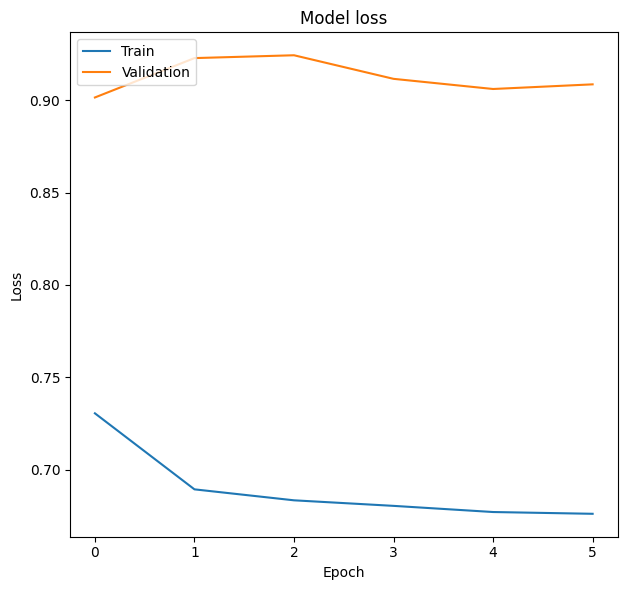

726/726 [==============================] - 1s 741us/step - loss: 0.9015 - accuracy: 0.7112
Test Accuracy: 71.12%


In [409]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare['duration.s'])
data_peak = np.array(solar_flare['peak.c/s'])
data_counts = np.array(solar_flare['total.counts'])
data_radial = np.array(solar_flare['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 10

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.9)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

bestmodel = Model(inputs=input_layer, outputs=output_layer)

bestmodel.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = bestmodel.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = bestmodel.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [410]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Test it on solar data 2017-2018

In [413]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = bestmodel.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 886us/step - loss: 1.0384 - accuracy: 0.7006
New Test Accuracy: 70.06%


In [414]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = bestmodel.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 0s 755us/step
Precision: 60.07%
Recall: 70.06%
F1 Score: 63.37%


## LSTM + GRU 2012

In [415]:
# Extract data for the year 2012
year_to_extract = 2012
solar_flare_for_2012 =  solar_flare[solar_flare.index.year == year_to_extract]

solar_flare_for_2012

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2012-01-01 01:57:42,12010101,204,100,47480.0,3-6,0,0,0,0,A0,PE,PS,Q1,NaN
2012-01-01 02:24:54,12010102,260,42,34120.0,6-12,948,182,965,1384,A0,DR,P1,PE,Q2
2012-01-01 03:52:30,12010104,2104,336,782640.0,6-12,-540,-395,669,1389,A0,DR,P1,PE,Q2
2012-01-01 05:23:26,12010107,176,44,23160.0,6-12,966,167,981,1384,A0,P1,PE,Q1,NaN
2012-01-01 05:39:06,12010108,248,26,25680.0,6-12,-521,-397,655,1389,A0,DR,P1,PE,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 21:39:46,12123122,472,64,79152.0,6-12,-930,322,985,0,A0,P1,PE,Q1,NaN
2012-12-31 21:44:30,12123128,204,24,23328.0,6-12,-101,476,486,1640,A0,P1,PE,Q1,NaN
2012-12-31 21:49:02,12123126,400,24,39672.0,6-12,-99,465,475,1640,A0,P1,PE,Q1,NaN


In [420]:
model_name="LSTM + GRU 2012 with recurrent_dropout"
epochs=100
batch_size=64
recurrent_dropout=0.9

[[-0.6707729  -0.13847892 -0.1619157  -2.444481  ]
 [-0.5342047  -0.23506333 -0.17023934  0.96252745]
 [ 3.96279     0.25451973  0.29610974 -0.08252381]
 ...
 [-0.1927843  -0.2650378  -0.1667803  -0.7674561 ]
 [ 0.04133258  1.0005511   0.2825327  -0.7039057 ]
 [ 1.2509364  -0.22840233 -0.1103489   1.0684448 ]]
Epoch 1/100
144/144 [==============================] - 2s 4ms/step - loss: 0.9096 - accuracy: 0.7361 - val_loss: 0.5656 - val_accuracy: 0.8345 - lr: 0.0010
Epoch 2/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.7877 - val_loss: 0.5676 - val_accuracy: 0.8349 - lr: 0.0010
Epoch 3/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.7883 - val_loss: 0.5652 - val_accuracy: 0.8354 - lr: 0.0010
Epoch 4/100
144/144 [==============================] - 0s 2ms/step - loss: 0.6440 - accuracy: 0.7886 - val_loss: 0.5679 - val_accuracy: 0.8328 - lr: 0.0010
Epoch 5/100
144/144 [==============================] - 0s 2ms/st

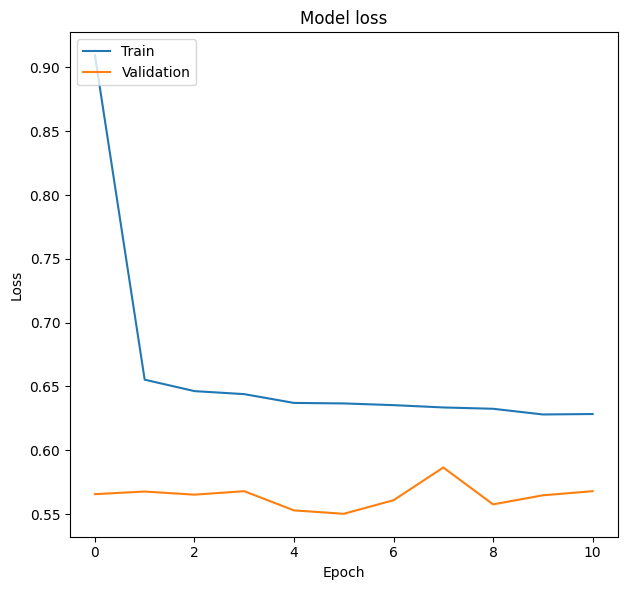

72/72 [==============================] - 0s 669us/step - loss: 0.5502 - accuracy: 0.8380
Test Accuracy: 83.80%


In [421]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare_for_2012['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare_for_2012['duration.s'])
data_peak = np.array(solar_flare_for_2012['peak.c/s'])
data_counts = np.array(solar_flare_for_2012['total.counts'])
data_radial = np.array(solar_flare_for_2012['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 5

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [422]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

In [423]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '70.74%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.80%'],
 ['LSTM + GRU 2002-2016 with recurrent_dropout', 10, 0.9, 100, 64, '71.12%'],
 ['LSTM + GRU 2012 with recurrent_dropout', 5, 0.9, 100, 64, '83.80%']]

# Test it on solar data 2017-2018

In [424]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 656us/step - loss: 1.1813 - accuracy: 0.6995
New Test Accuracy: 69.95%


In [425]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 0s 590us/step
Precision: 58.69%
Recall: 69.95%
F1 Score: 61.40%


## LSTM + GRU 2016

In [426]:
# Extract data for the year 2016
year_to_extract = 2016
solar_flare_for_2016 =  solar_flare[solar_flare.index.year == year_to_extract]

solar_flare_for_2016

,flare,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
start_datetime,,,,,,,,,,,,,,
2016-01-01 03:57:46,16010101,268,28,14964.0,6-12,854,-292,903,2473,A0,DF,DR,P1,PE Q3
2016-01-01 04:01:46,16010102,156,26,7980.0,6-12,855,-285,902,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:16:10,16010103,244,38,10200.0,6-12,828,-312,885,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:24:10,16010104,624,52,47100.0,6-12,794,-310,853,2473,A0,DF,DR,P1,PE Q3
2016-01-01 05:36:18,16010105,904,44,79212.0,6-12,899,-299,948,2473,A0,DF,DR,P1,PE Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-26 22:17:02,16122603,484,152,75328.0,3-6,0,0,0,0,A0,GE,NS,PE,Q2
2016-12-26 23:28:18,16122604,1096,304,142048.0,3-6,0,0,0,0,A0,DR,NS,PE,Q2
2016-12-27 08:39:06,16122701,392,80,32344.0,3-6,0,0,0,0,A0,DF,NS,PE,Q3 SE


In [427]:
model_name="LSTM + GRU 2016 with recurrent_dropout"
epochs=100
batch_size=64
recurrent_dropout=0.9

[[-0.51585805 -0.34540248 -0.2881604  -0.08666818]
 [-0.7845769  -0.34871662 -0.29964396 -0.08704862]
 [-0.5734407  -0.32883173 -0.2959937  -0.09351614]
 ...
 [-0.21834794 -0.2592346  -0.25958306 -0.4302076 ]
 [ 0.08875929 -0.35203078 -0.2842602  -0.25482368]
 [-0.6790088  -0.312261   -0.2945862  -0.12927772]]
Epoch 1/100
33/33 [==============================] - 1s 9ms/step - loss: 1.5765 - accuracy: 0.5648 - val_loss: 1.1101 - val_accuracy: 0.7857 - lr: 0.0010
Epoch 2/100
33/33 [==============================] - 0s 3ms/step - loss: 1.0640 - accuracy: 0.6494 - val_loss: 0.8077 - val_accuracy: 0.7973 - lr: 0.0010
Epoch 3/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9540 - accuracy: 0.6760 - val_loss: 0.8520 - val_accuracy: 0.7876 - lr: 0.0010
Epoch 4/100
33/33 [==============================] - 0s 3ms/step - loss: 0.9318 - accuracy: 0.6900 - val_loss: 0.8460 - val_accuracy: 0.7915 - lr: 0.0010
Epoch 5/100
33/33 [==============================] - 0s 3ms/step - loss:

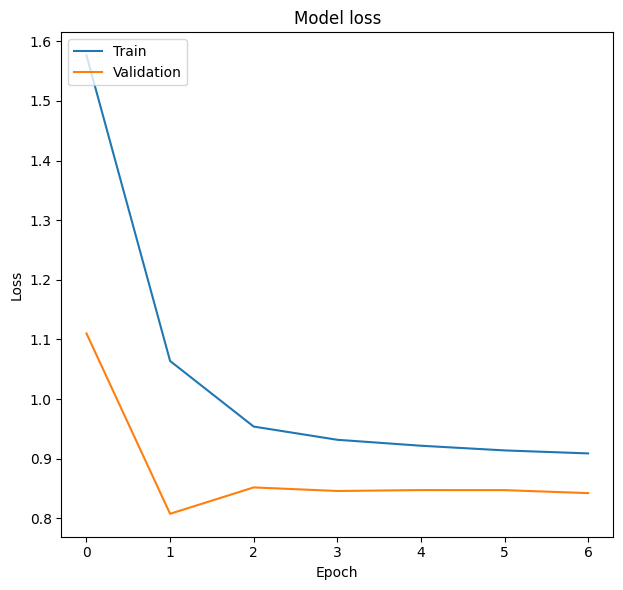

17/17 [==============================] - 0s 895us/step - loss: 0.8077 - accuracy: 0.7973
Test Accuracy: 79.73%


In [429]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Input
from tensorflow.keras.layers import concatenate
from tensorflow.keras.models import Model

# Assuming 'energy.keV' is a column with categorical data
categories = solar_flare_for_2016['energy.kev'].values

# Encode the categories
label_encoder = LabelEncoder()
categories_encoded = label_encoder.fit_transform(categories)

      
data_duration = np.array(solar_flare_for_2016['duration.s'])
data_peak = np.array(solar_flare_for_2016['peak.c/s'])
data_counts = np.array(solar_flare_for_2016['total.counts'])
data_radial = np.array(solar_flare_for_2016['radial'])

# Define the sequence length (number of previous categories to consider)
sequence_length = 5

# Create sequences and labels
X_sequences, y_sequences = [], []

X = np.stack((data_duration, data_peak, data_counts, data_radial), axis=-1)
X = X.astype('float32')

# Use StandardScaler to scale your input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = categories_encoded

print(X)

for i in range(len(X) - sequence_length):
    X_sequences.append(X[i:i + sequence_length])
    y_sequences.append(y[i + sequence_length])

X_sequences = np.array(X_sequences)
y_sequences = np.array(y_sequences)

# Split the data into training and testing sets
train_size = int(0.8 * len(X_sequences))
X_train, X_test = X_sequences[:train_size], X_sequences[train_size:]
y_train, y_test = y_sequences[:train_size], y_sequences[train_size:]


# Create an LSTM and a GRU model in parallel
input_layer = Input(shape=(sequence_length, X_sequences.shape[2]))
lstm_layer = LSTM(50)(input_layer)
gru_layer = GRU(50, recurrent_dropout=0.6)(input_layer)

# Combine the LSTM and GRU outputs
combined = concatenate([lstm_layer, gru_layer], axis=-1)

output_layer = Dense(len(np.unique(categories_encoded)), activation='softmax')(combined)

model = Model(inputs=input_layer, outputs=output_layer)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Implement learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Implement early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), callbacks=[lr_scheduler, early_stopping])

# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


In [430]:
results.append([model_name, sequence_length, recurrent_dropout, epochs, batch_size, f'{test_accuracy * 100:.2f}%'])

# Test it on solar data 2017-2018

In [431]:
# Assuming 'energy.keV' is a column with categorical data in the new data (2017-2018)
new_data_categories = new_solar_flare['energy.kev'].values

# Encode the categories for the new data using the same label encoder
new_categories_encoded = label_encoder.transform(new_data_categories)

# Assuming the other features in the new data have the same column names
new_data_duration = np.array(new_solar_flare['duration.s'])
new_data_peak = np.array(new_solar_flare['peak.c/s'])
new_data_counts = np.array(new_solar_flare['total.counts'])
new_data_radial = np.array(new_solar_flare['radial'])

# Create sequences and labels for the new data
new_X_sequences, new_y_sequences = [], []

new_X = np.stack((new_data_duration, new_data_peak, new_data_counts, new_data_radial), axis=-1)
new_X = new_X.astype('float32')

# Use the same StandardScaler to scale your input data
new_X = scaler.transform(new_X)

new_y = new_categories_encoded

for i in range(len(new_X) - sequence_length):
    new_X_sequences.append(new_X[i:i + sequence_length])
    new_y_sequences.append(new_y[i + sequence_length])

new_X_sequences = np.array(new_X_sequences)
new_y_sequences = np.array(new_y_sequences)

# Evaluate the model on the new data
new_test_loss, new_test_accuracy = model.evaluate(new_X_sequences, new_y_sequences)
print(f'New Test Accuracy: {new_test_accuracy * 100:.2f}%')

69/69 [==============================] - 0s 711us/step - loss: 1.2744 - accuracy: 0.5496
New Test Accuracy: 54.96%


In [432]:
from sklearn.metrics import precision_score, recall_score, f1_score


# Evaluate the model on the new data
new_test_predictions = model.predict(new_X_sequences)
new_test_predictions_classes = np.argmax(new_test_predictions, axis=1)

precision = precision_score(new_y_sequences, new_test_predictions_classes, average='weighted')
recall = recall_score(new_y_sequences, new_test_predictions_classes, average='weighted')
f1 = f1_score(new_y_sequences, new_test_predictions_classes, average='weighted')

print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')


69/69 [==============================] - 0s 592us/step
Precision: 36.79%
Recall: 54.96%
F1 Score: 43.34%


# Display results

In [433]:
results

[['LSTM 2002-2016', 10, 0.0, 100, 64, '70.74%'],
 ['LSTM + GRU 2002-2016', 10, 0.0, 100, 64, '71.80%'],
 ['LSTM + GRU 2002-2016 with recurrent_dropout', 10, 0.9, 100, 64, '71.12%'],
 ['LSTM + GRU 2012 with recurrent_dropout', 5, 0.9, 100, 64, '83.80%'],
 ['LSTM + GRU 2016 with recurrent_dropout', 5, 0.9, 100, 64, '79.73%']]

In [434]:
import pandas as pd

headers=['Model Name', 'Sequence length', 'recurrent_dropout', 'epochs', 'batch_size', 'Accuracy%']

# Create DataFrame
df = pd.DataFrame(results, columns=headers)

# Display the DataFrame
df

,Model Name,Sequence length,recurrent_dropout,epochs,batch_size,Accuracy%
0,LSTM 2002-2016,10,0.0,100,64,70.74%
1,LSTM + GRU 2002-2016,10,0.0,100,64,71.80%
2,LSTM + GRU 2002-2016 with recurrent_dropout,10,0.9,100,64,71.12%
3,LSTM + GRU 2012 with recurrent_dropout,5,0.9,100,64,83.80%
4,LSTM + GRU 2016 with recurrent_dropout,5,0.9,100,64,79.73%
